<a href="https://colab.research.google.com/github/lephuocdat2000/Advanced-CV/blob/main/VGG16-Dog-Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import tensorflow as tf
import torch
from torchvision import transforms
import torchvision.models as models
import zipfile
from PIL import Image
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
#from keras.applications.vgg16 import VGG16 

In [17]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.RandomHorizontalFlip(),
                               transforms.CenterCrop(250),
                               transforms.Resize(224)])

In [31]:
model_test=models.vgg16(pretrained=True)


In [18]:
vgg16_1 = models.vgg16(pretrained=True)
vgg16_1.classifier = vgg16_1.classifier[0:2]
vgg16_2= models.vgg16(pretrained=True)
vgg16_2.classifier=vgg16_2.classifier[0:5]

In [19]:
vgg16_1

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

#Read data

In [20]:
def Read_data(deep_model):
  path_to_zip_file = '/content/drive/MyDrive/Thị giác máy tính/Thị giác máy tính nâng cao/Dog and Cat.zip'
  imgzip = zipfile.ZipFile(path_to_zip_file)
  inflist = imgzip.infolist()
  images=[]
  labels=[]
  for f in inflist:
      if '.jpg' in f.filename:
        ifile = imgzip.open(f)
        img = Image.open(ifile)
        #Cho vào mạng alexnet
        img_t=transform(img)
        batch_t = torch.unsqueeze(img_t,0)
        out = deep_model(batch_t)
        out=out.detach().numpy()
        images.append(out)
        if 'dog' in f.filename: labels.append(1)
        elif 'cat' in f.filename: labels.append(0)
  images=np.array(images)
  labels=np.array(labels)
  return images,labels

In [21]:
images1,labels1 = Read_data(vgg16_1)
images2,labels2 = Read_data(vgg16_2)

#Train model


In [22]:
def Split_data(images,labels):
  X_train, X_test, y_train, y_test = train_test_split(images,labels, test_size=0.2, random_state=42)
  X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
  X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
  return X_train,X_test,y_train,y_test
def Train_Function(X,y):
   #model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
   model = SVC(gamma='auto')
   model.fit(X,y)
   return model
def Accuracy(model,X,y_true):
   y_pred=model.predict(X)
   return y_pred,accuracy_score(y_pred,y_true)

In [33]:
X_train_fc1,X_test_fc1,y_train_fc1,y_test_fc1 = Split_data(images1,labels1)
X_train_fc2,X_test_fc2,y_train_fc2,y_test_fc2 = Split_data(images2,labels2)
model1=Train_Function(X_train_fc1,y_train_fc1)
model2=Train_Function(X_train_fc2,y_train_fc2)
y_pred_train_fc1,Accuracy_Train_FC1 = Accuracy(model1,X_train_fc1,y_train_fc1)
y_pred_test_fc1,Accuracy_Test_FC1 = Accuracy(model1,X_test_fc1,y_test_fc1)
y_pred_train_fc2,Accuracy_Train_FC2 = Accuracy(model2,X_train_fc2,y_train_fc2)
y_pred_test_fc2,Accuracy_Test_FC2 = Accuracy(model2,X_test_fc2,y_test_fc2)
print('Accuracy_Train_FC1:',Accuracy_Train_FC1)
print('Accuracy_Train_FC2:',Accuracy_Train_FC1)
print('Accuracy_Test_FC1:',Accuracy_Test_FC1)
print('Accuracy_Test_FC2:',Accuracy_Test_FC2)

Accuracy_Train_FC1: 0.98125
Accuracy_Train_FC2: 0.98125
Accuracy_Test_FC1: 0.926829268292683
Accuracy_Test_FC2: 0.926829268292683


In [34]:
from sklearn.metrics import f1_score,precision_score,recall_score
print('precision_fc1:',precision_score(y_pred_test_fc1,y_test_fc1,average='binary'))
print('precision_fc2:',precision_score(y_pred_test_fc2,y_test_fc2,average='binary'))
print('recall_fc1:',recall_score(y_pred_test_fc1,y_test_fc1,average='binary'))
print('recall_fc2:',recall_score(y_pred_test_fc2,y_test_fc2,average='binary'))
print('f1_score_fc1:',f1_score(y_pred_test_fc1,y_test_fc1,average='binary'))
print('f1_score_fc2:',f1_score(y_pred_test_fc2,y_test_fc2,average='binary'))

precision_fc1: 0.9473684210526315
precision_fc2: 1.0
recall_fc1: 0.9
recall_fc2: 0.8636363636363636
f1_score_fc1: 0.9230769230769231
f1_score_fc2: 0.9268292682926829


<Figure size 432x288 with 0 Axes>

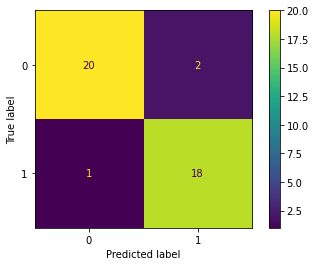

<Figure size 432x288 with 0 Axes>

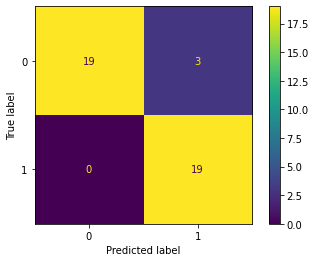

In [25]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plt.figure()
plot_confusion_matrix(model1, X_test_fc1, y_test_fc1)
plt.figure()
plot_confusion_matrix(model2, X_test_fc2, y_test_fc2)
plt.show()